In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import joblib

In [2]:
# Load dataset
df = pd.read_csv("customer_churn.csv")




In [3]:
# Display first few rows and column names
print(df.head())
print(df.columns.tolist())

   Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0          143.32      0  
1                7.0          129.29      0  
2             

In [4]:
# 3. Handle missing values
df.dropna(inplace=True)

In [5]:
# 4. Encode categorical variables
cat_cols = ['PreferedOrderCat', 'MaritalStatus']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 5. Feature/target split
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [6]:
# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, logreg.predict(X_test)))



Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       569
           1       0.74      0.40      0.52       104

    accuracy                           0.89       673
   macro avg       0.82      0.69      0.73       673
weighted avg       0.87      0.89      0.87       673



In [7]:
# 8. Decision Tree
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
print("Decision Tree:\n", classification_report(y_test, tree.predict(X_test)))

# 9. Save models and columns
joblib.dump(logreg, "model_logreg.pkl")
joblib.dump(tree, "model_tree.pkl")
joblib.dump(X.columns.tolist(), "columns.pkl")


Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       569
           1       0.66      0.61      0.63       104

    accuracy                           0.89       673
   macro avg       0.80      0.77      0.78       673
weighted avg       0.89      0.89      0.89       673



['columns.pkl']

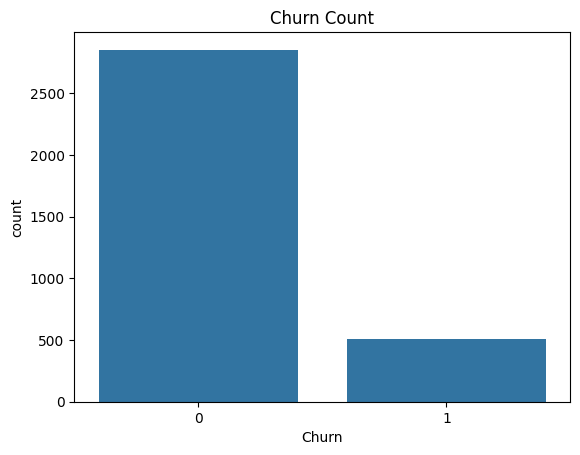

In [8]:
# See how many customers churned
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()